In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [2]:
df=pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [5]:
df["horsepower"].replace("?",np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [6]:
df["normalized-losses"].isnull().sum()

41

In [7]:
df["horsepower"].isnull().sum()

2

In [8]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["normalized-losses","horsepower"]]=si.fit_transform(df[["normalized-losses","horsepower"]])
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [9]:
x=df.iloc[:,:-1]
x

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [10]:
y=df.iloc[:,-1]
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

**Skewness Removal**

Skewness can be removed for numeric columns only.

In [11]:
from scipy.stats import skew
skew(x["normalized-losses"])

0.8485348696008058

In [12]:
skew(x["horsepower"])

1.3875147343096037

In the above dataset there are 8 numeric columns.

So we can find the skewness of all by using for loop

for this we will first select all numeric columns.

In [13]:
x.select_dtypes(["int64","float64"])

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,64.1,48.8,130,111.0,21,27
1,3,122.0,64.1,48.8,130,111.0,21,27
2,1,122.0,65.5,52.4,152,154.0,19,26
3,2,164.0,66.2,54.3,109,102.0,24,30
4,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28
201,-1,95.0,68.8,55.5,141,160.0,19,25
202,-1,95.0,68.9,55.5,173,134.0,18,23
203,-1,95.0,68.9,55.5,145,106.0,26,27


To get only column names we will use .columns attribute

In [14]:
x.select_dtypes(["int64","float64"]).columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [16]:
colnames=x.select_dtypes(["int64","float64"]).columns
colnames

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [17]:
for i in x[colnames]:
  print(i)
  print(skew(x[i]))

symboling
0.20952469094997359
normalized-losses
0.8485348696008058
width
0.8973753485201392
height
0.06265991683394276
engine-size
1.9333748457840114
horsepower
1.3875147343096037
city-mpg
0.6588377533622138
highway-mpg
0.5360379305163596


symboling
0.20952469094997359


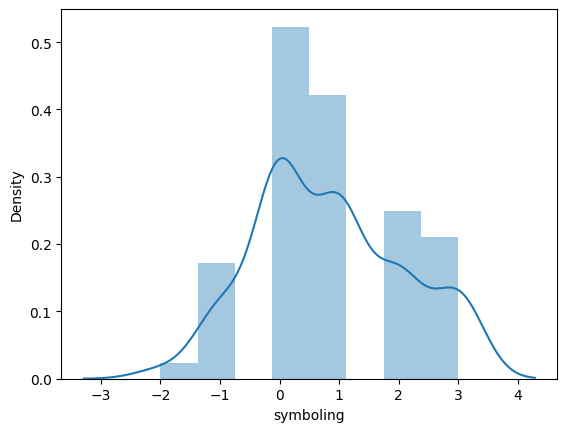

normalized-losses
0.8485348696008058


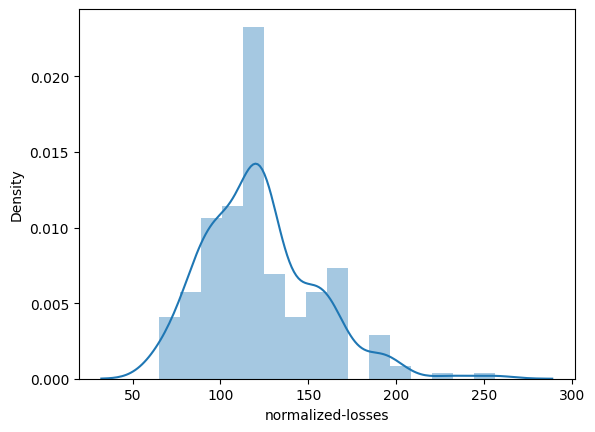

width
0.8973753485201392


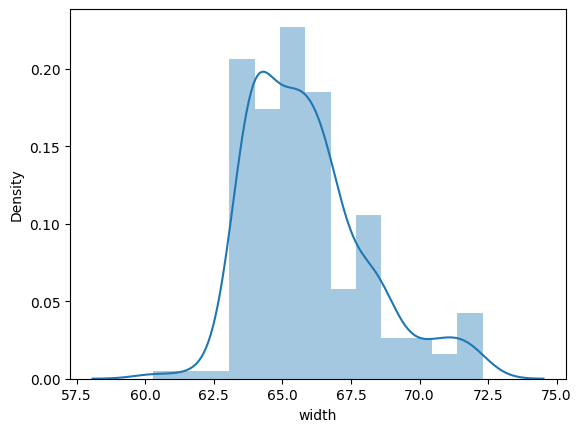

height
0.06265991683394276


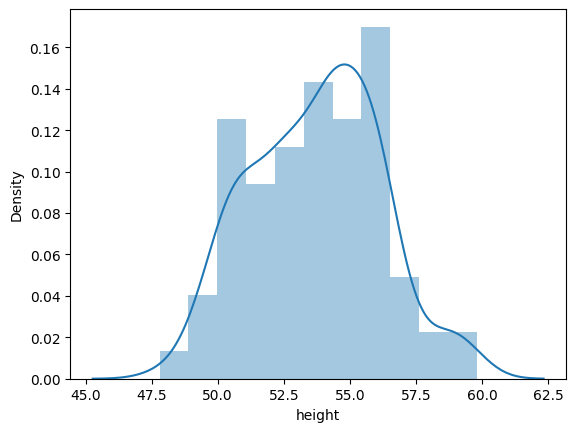

engine-size
1.9333748457840114


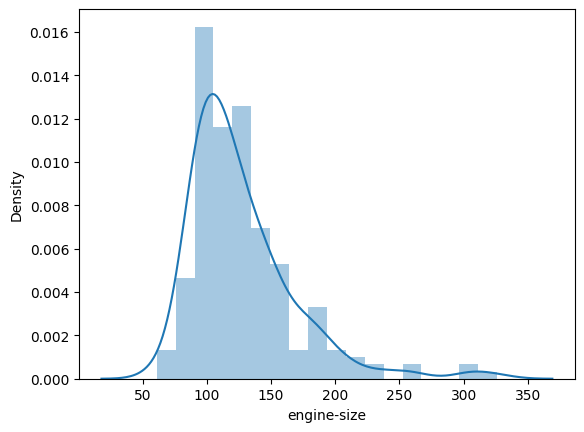

horsepower
1.3875147343096037


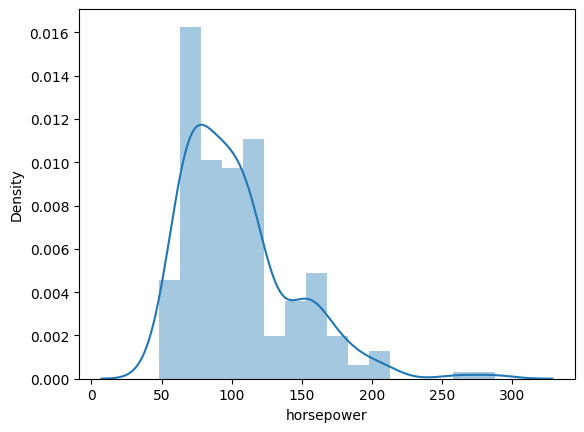

city-mpg
0.6588377533622138


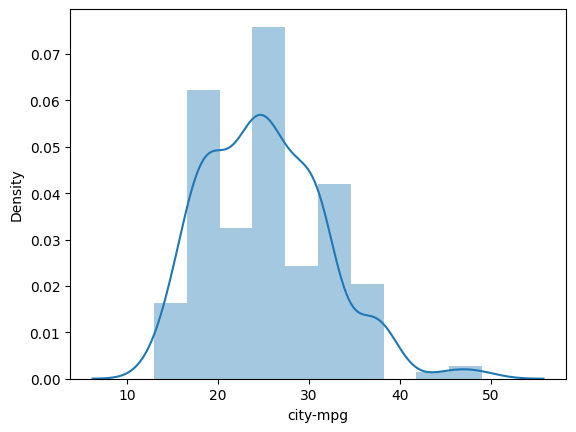

highway-mpg
0.5360379305163596


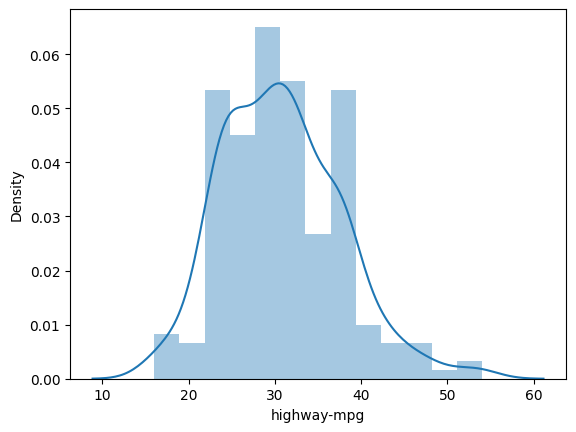

In [18]:
for i in x[colnames]:
  print(i)
  print(skew(x[i]))
  plt.figure()
  sns.distplot(x[i])
  plt.show()

Here we can see that all attribute are skewed except height.

There are two ways of removing skewness 
1.sqrt.transformation
2.log transformation

In real world senarios normally log transformation is used.

Before removing the skewness there are certain things that we nedd to check:

1.If the attribute is having good co-relation with target(y) then  do not remove skewness.

2.If their is negative skewness for any of the attribute then also do not remove it. 

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [20]:
df.corr() 

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.105790,0.071389,-0.035823,0.034606,-0.085781
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.110997,0.203434,-0.218749,-0.178221,0.133424
width,-0.232919,0.084195,1.000000,0.279210,0.735433,0.642195,-0.642704,-0.677218,0.718253
height,-0.541038,-0.370706,0.279210,1.000000,0.067149,-0.110137,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.110997,0.735433,0.067149,1.000000,0.810713,-0.653658,-0.677470,0.852995
horsepower,0.071389,0.203434,0.642195,-0.110137,0.810713,1.000000,-0.803162,-0.770903,0.746589
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.653658,-0.803162,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.677470,-0.770903,0.971337,1.000000,-0.679048
price,-0.085781,0.133424,0.718253,0.132444,0.852995,0.746589,-0.654611,-0.679048,1.000000


In [21]:
df.corr().style.background_gradient()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.105790,0.071389,-0.035823,0.034606,-0.085781
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.110997,0.203434,-0.218749,-0.178221,0.133424
width,-0.232919,0.084195,1.000000,0.279210,0.735433,0.642195,-0.642704,-0.677218,0.718253
height,-0.541038,-0.370706,0.279210,1.000000,0.067149,-0.110137,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.110997,0.735433,0.067149,1.000000,0.810713,-0.653658,-0.677470,0.852995
horsepower,0.071389,0.203434,0.642195,-0.110137,0.810713,1.000000,-0.803162,-0.770903,0.746589
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.653658,-0.803162,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.677470,-0.770903,0.971337,1.000000,-0.679048
price,-0.085781,0.133424,0.718253,0.132444,0.852995,0.746589,-0.654611,-0.679048,1.000000


<Axes: >

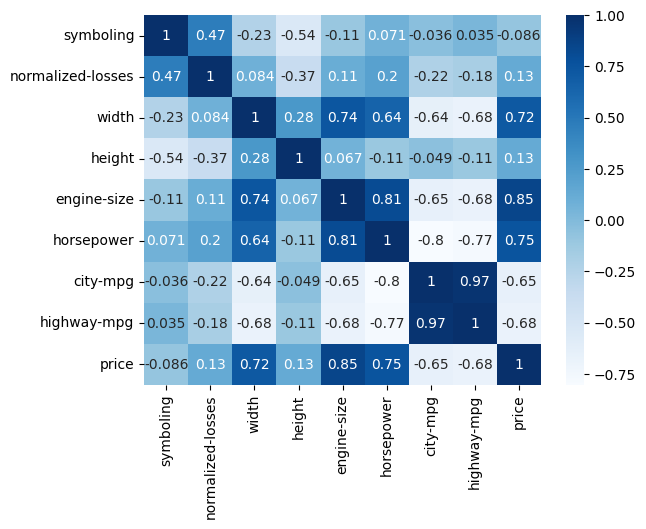

In [23]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [24]:
df.corr()["price"].sort_values()

highway-mpg         -0.679048
city-mpg            -0.654611
symboling           -0.085781
height               0.132444
normalized-losses    0.133424
width                0.718253
horsepower           0.746589
engine-size          0.852995
price                1.000000
Name: price, dtype: float64

Form above we can see that there is need of removing skewness for normalized losses only.

In [25]:
np.log(x["normalized-losses"])

0      4.804021
1      4.804021
2      4.804021
3      5.099866
4      5.099866
         ...   
200    4.553877
201    4.553877
202    4.553877
203    4.553877
204    4.553877
Name: normalized-losses, Length: 205, dtype: float64

In [26]:
x["normalized-losses"]=np.log(x["normalized-losses"])

In [27]:
skew(x["normalized-losses"])

0.03137735337911685

So the skewness for normalized losses is reduced to 0.0313 from 0.848